In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd
import seaborn

Leemos los datos y seleccionamos los datos de interés

In [12]:
# Datos
dataset = pd.read_csv('https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
# Datos de interés: pf_indentity, junto con otras columnas más generales
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]
important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols
# Organizando los datos
dataset = dataset[important_cols].replace('-', np.nan)
# y volveremos a convertir las columnas con puntajes a tipo numérico.
for score_col in score_cols:
    dataset[score_col] = pd.to_numeric(dataset[score_col])
dataset

# Por ahora las filas con NaN de hf_score y pf_identity las eliminaremos.
dataset = dataset.dropna(subset=['hf_score', 'pf_identity'])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


In [41]:
# P1.1
Min = dataset.min()
Max = dataset.max()
dataset.describe()

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,1540.000000,308.000000,1537.000000,1540.000000,1540.000000,1519.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,2012.625974,6.379870,6.701366,7.922078,7.314935,7.485188,7.280649,7.163409,77.671429,6.792981,77.420779,6.978214,77.465584
std,2.855925,3.640415,4.685828,4.038529,4.056317,3.502156,3.181577,1.392409,44.757695,0.906827,44.776169,1.056239,44.782074
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000,1.000000,2.580000,1.000000,3.690000,1.000000
25%,2010.000000,7.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.147500,39.000000,6.220000,39.000000,6.280000,39.000000
50%,2013.000000,7.000000,10.000000,10.000000,10.000000,10.000000,8.800000,7.145000,77.500000,6.880000,77.000000,6.900000,77.000000
75%,2015.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.380000,116.000000,7.440000,116.000000,7.880000,116.000000
max,2017.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.560000,162.000000,9.110000,162.000000,9.120000,162.000000


El rango, definido como la diferencia entre el valor máximo y mínimo de una variable. En las variables de Identidad específicas el rango es 10, porque en general se establecen requisitos que si se cumplen se asignan 10 puntos, sin necesidad de aumentos graduales.

In [43]:
# P.1.2 Comparamos los países
dataset_group_by_year = dataset[['year','pf_identity', 'hf_score']].groupby('year').describe()
dataset_group_by_year = dataset_group_by_year.reset_index() # Ponemos al año como una columna
dataset_group_by_year

year pf_identity                           ... hf_score                             
              count      mean       std  min  ...      min     25%    50%     75%   max
0  2008       141.0  7.721986  3.083646  0.0  ...     4.81  6.3700  7.040  8.0000  9.12
1  2009       141.0  7.721986  3.083646  0.0  ...     4.91  6.4000  7.020  7.9800  9.06
2  2010       153.0  7.485621  3.258197  0.0  ...     4.92  6.3600  6.960  7.8800  9.02
3  2011       153.0  7.452941  3.263939  0.0  ...     4.59  6.2800  6.960  7.9400  9.02
4  2012       153.0  7.452941  3.263939  0.0  ...     4.55  6.3100  6.880  7.9400  8.99
5  2013       157.0  7.367516  3.278430  0.0  ...     3.88  6.3400  6.870  7.8300  8.94
6  2014       159.0  7.416352  3.253623  0.0  ...     3.94  6.2250  6.830  7.9300  8.95
7  2015       159.0  6.964151  2.954299  0.0  ...     3.83  6.1850  6.780  7.8300  8.89
8  2016       162.0  6.870370  3.069260  0.0  ...     3.69  6.1750  6.820  7.7575  8.90
9  2017       162.0  6.496914  3.153908  0.0  ...     3.79  6.2125  6.825  7.7400  8.88

[10 rows x 17 columns]

P.1.2: Se puede hacer un análisis transversal, comparando a lo largo de un período los valores que asumen las diferentes variables o comparar la series a lo largo del tiempo, ver casos de Argentina y Brasil. La media (transversal) del indicador de identidad así como el indicador global del Human Freedom han ido disminuyendo a lo largo del tiempo. Los datos muestran que la distribución esta sesgada a la derecha. En el caso del indicador salud, la media es menor a la mediana (la observación con frecuencia siguiente a la que concentra el 50% de los datos). En cuanto a identidad personal Argentina ha mostrado mayores indices de libertad desde el 2008 en adelante. Brasil ha empeorado su posición desde el 2015. En cuanto al indicador global del Human Freedom, Argentina ha mostrado valores cercanos a la media mundial, en todos los períodos desde el 2008, aunque todavía no logra superar esos valores.


In [44]:
argentina_dataset = dataset.loc[dataset['countries']=='Argentina',['year','pf_identity','hf_score']]
argentina_dataset.sort_values(by=['year'])
brazil_dataset = dataset.loc[dataset['countries']=='Brazil',['year','pf_identity','hf_score']]
brazil_dataset.sort_values(by=['year'])
print(argentina_dataset, brazil_dataset)

      year  pf_identity  hf_score
3     2017         10.0      6.86
165   2016         10.0      6.75
327   2015         10.0      6.54
489   2014         10.0      6.27
651   2013         10.0      6.55
813   2012         10.0      6.64
975   2011         10.0      6.93
1137  2010         10.0      6.96
1299  2009         10.0      7.06
1551  2008         10.0      7.10       year  pf_identity  hf_score
20    2017          6.7      6.48
182   2016          6.7      6.28
344   2015          6.7      6.21
506   2014         10.0      6.45
668   2013         10.0      6.75
830   2012         10.0      6.89
992   2011         10.0      7.05
1154  2010         10.0      7.12
1316  2009         10.0      7.02
1550  2008         10.0      7.05


P.1.3. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

La evolución de las medias mundiales de los dos indicadores de libertad mostrados han disminuido.

En la tabla inicial de estadísticos se mostro la media, mediana y desviación estándar. Es correcto utilizar estas medidas. El Boxplot nos muestra como estan distribuidos las medias de Identidad de cada región, dividiendo el mundo en 10 regiones. En cuanto a la libertad personal, Latinoamérica y el Caribe estan en el puesto 7, detrás de Africa y el Sur de Asia. En el caso del Human Freedom Latinoamérica y el Caribe estan en el puesto 6. 

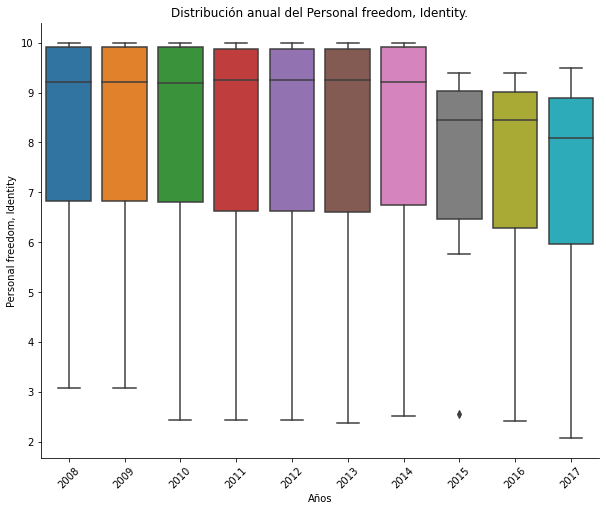

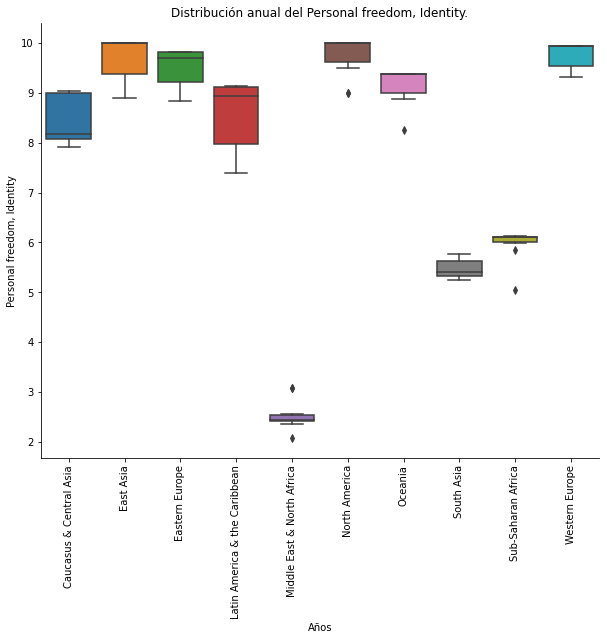

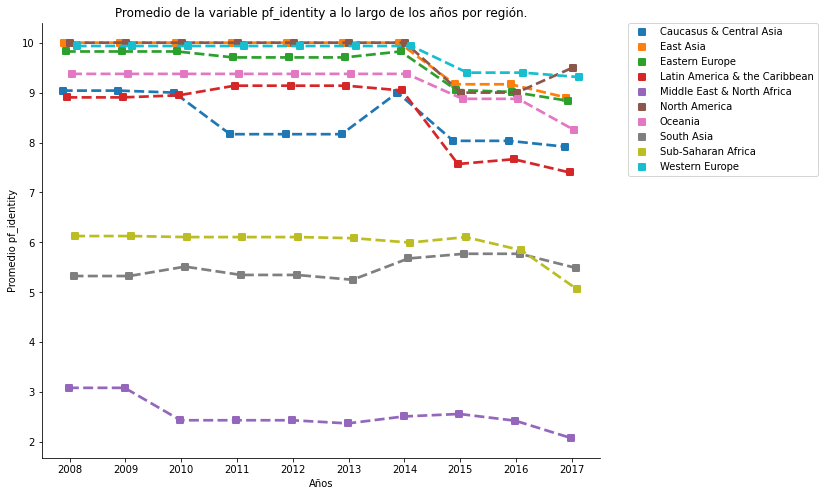

In [57]:
pf_identity_group_by_year_region = dataset[['year', 'region', 'pf_identity']].groupby(['region', 'year']).mean()
pf_identity_group_by_year_region = pf_identity_group_by_year_region.reset_index() # Ponemos al año como una columna

# Gráfico de evolución de medias: Box-Plot
# Identidad Box-plot evolución anual
fig = plt.figure(figsize=(10,8))
seaborn.boxplot(data=pf_identity_group_by_year_region,
                  x='year', y='pf_identity')

plt.ylabel('Personal freedom, Identity')
plt.xlabel('Años')
plt.title('Distribución anual del Personal freedom, Identity.')
plt.xticks(rotation=45)
seaborn.despine()


# Box-plot, regiones
plt.figure(figsize=(10,8))
seaborn.boxplot(data=pf_identity_group_by_year_region,
                  x='region', y='pf_identity')

plt.ylabel('Personal freedom, Identity')
plt.xlabel('Años')
plt.title('Distribución anual del Personal freedom, Identity.')
plt.xticks(rotation=90)
seaborn.despine()

# Gráfico de evolución de medias: Lineal
plt.figure(figsize=(10,8))
seaborn.pointplot(data=pf_identity_group_by_year_region,
                  x='year', y='pf_identity',
                  hue='region', dodge=True, ci=None,
                  markers='s', linestyles='--', errwidth=1, capsize=0.2)

plt.ylabel('Promedio pf_identity')
plt.xlabel('Años')
plt.title('Promedio de la variable pf_identity a lo largo de los años por región.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Outliers (6):
a) Middle East & North Africa (one in both sides)
b) North America: lower side
c) Oceania: Lower side
d) Sub-Saharian Africa: 2 lower side

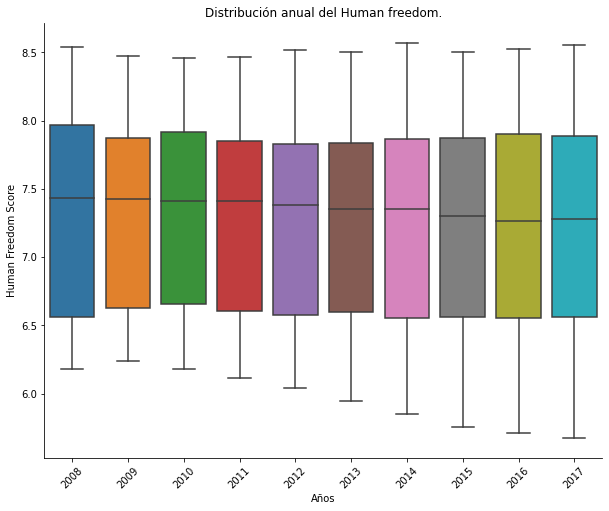

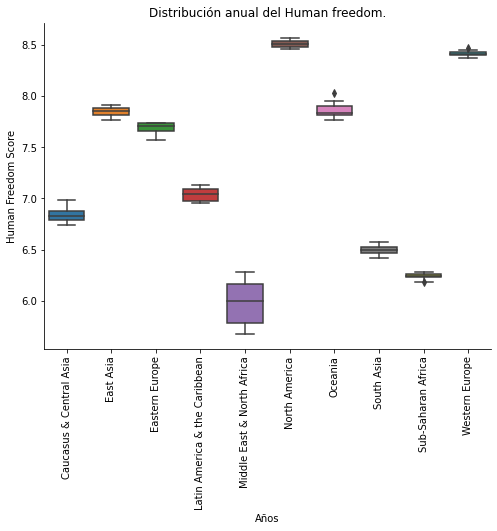

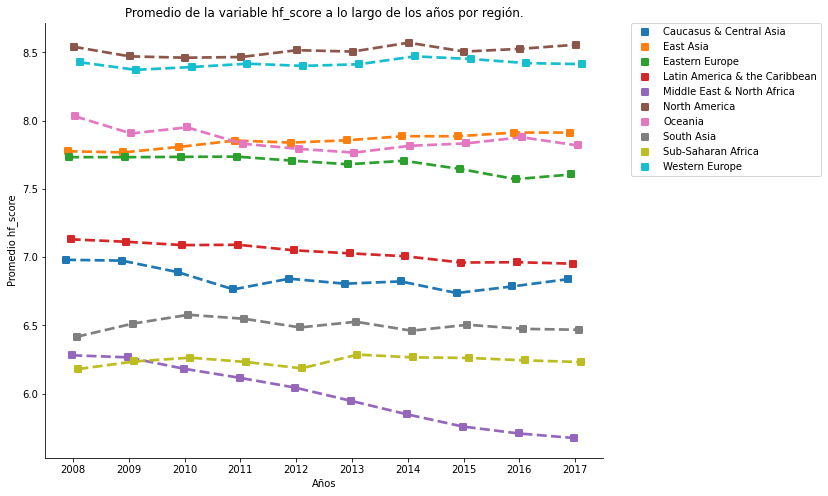

In [55]:
# Human Freedom
# Human Freedom Score
pf_identity_group_by_year_region = dataset[['year', 'region', 'hf_score']].groupby(['region', 'year']).mean()
pf_identity_group_by_year_region = pf_identity_group_by_year_region.reset_index()

fig = plt.figure(figsize=(10,8))
seaborn.boxplot(data=pf_identity_group_by_year_region,
                  x='year', y='hf_score')

plt.ylabel('Human Freedom Score')
plt.xlabel('Años')
plt.title('Distribución anual del Human freedom.')
plt.xticks(rotation=45)
seaborn.despine()
# Second grafic
plt.figure(figsize=(8,6))
seaborn.boxplot(data=pf_identity_group_by_year_region,
                  x='region', y='hf_score')

plt.ylabel('Human Freedom Score')
plt.xlabel('Años')
plt.title('Distribución anual del Human freedom.')
plt.xticks(rotation=90)
seaborn.despine()

# Third graphic
plt.figure(figsize=(10,8))
seaborn.pointplot(data=pf_identity_group_by_year_region,
                  x='year', y='hf_score',
                  hue='region', dodge=True, ci=None,
                  markers='s', linestyles='--', errwidth=1, capsize=0.2)

plt.ylabel('Promedio hf_score')
plt.xlabel('Años')
plt.title('Promedio de la variable hf_score a lo largo de los años por región.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

P.1.4 ¿Tiene sentido calcular la moda?
La moda tiene séntido calcularla porque nos puede informar si la distribución de la variable puede ser bimodal o no. La moda es más facil de encontrar en el caso de las variables cualitativas.


P.1.5: ¿Cómo pueden sanearse los valores faltantes?
La manera más sencilla es obviarlos. Eso no tiene consecuencias cuando estan al principio o al final de los datos. En análisis transversal obviarlos puede tener consecuencias cuando el país que, se supone por otros datos, lidera el cambio es excluido por falta de datos específicos a la variable analizada.
Otra manera es utilizar la media y reemplazarlo, no sera sesgada. Además hay métodos alternativos de extrapolación de datos.

P.1.6: ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales
o por grupo? ¿Los eliminaría del conjunto de datos?
Los graficos de Box-plot muestran outliers en el año 2015. En el análisis regional observamos varios outliers, 6 en el caso del personal Freedom (mostrado en gráfico respondido) y uno en el caso del Human Freedom (upper side)

P.2:
2.1, 2.2 up

In [61]:
argentina_dataset = dataset.loc[dataset['countries']=='Argentina',['year','pf_identity','hf_score']]
Brazil_dataset = dataset.loc[dataset['countries']=='Brazil',['year','pf_identity','hf_score']]
hf_score_lac = dataset[(dataset.region == "Latin America & the Caribbean")]['hf_score'].describe()
pf_identity_lac = dataset[(dataset.region == "Latin America & the Caribbean")]['pf_identity'].describe()
hf_score_world = dataset['pf_identity'].describe()
pf_identity_world = dataset['hf_score'].describe()
print(argentina_dataset.describe(), Brazil_dataset.describe(),hf_score_lac,
      pf_identity_lac, hf_score_world, pf_identity_world)

             year  pf_identity   hf_score
count    10.00000         10.0  10.000000
mean   2012.50000         10.0   6.766000
std       3.02765          0.0   0.264835
min    2008.00000         10.0   6.270000
25%    2010.25000         10.0   6.572500
50%    2012.50000         10.0   6.805000
75%    2014.75000         10.0   6.952500
max    2017.00000         10.0   7.100000              year  pf_identity   hf_score
count    10.00000    10.000000  10.000000
mean   2012.50000     9.010000   6.730000
std       3.02765     1.594051   0.346538
min    2008.00000     6.700000   6.210000
25%    2010.25000     7.525000   6.457500
50%    2012.50000    10.000000   6.820000
75%    2014.75000    10.000000   7.042500
max    2017.00000    10.000000   7.120000 count    258.000000
mean       7.036977
std        0.634897
min        3.800000
25%        6.762500
50%        7.020000
75%        7.377500
max        8.180000
Name: hf_score, dtype: float64 count    258.000000
mean       8.582171
std        1.

In [65]:
argentina_dataset = dataset.loc[dataset['countries']=='Argentina',['year','pf_identity','hf_score']]
Brazil_dataset = dataset.loc[dataset['countries']=='Brazil',['year','pf_identity','hf_score']]
argentina_dataset
Brazil_dataset

,year,pf_identity,hf_score
20,2017,6.7,6.48
182,2016,6.7,6.28
344,2015,6.7,6.21
506,2014,10.0,6.45
668,2013,10.0,6.75
830,2012,10.0,6.89
992,2011,10.0,7.05
1154,2010,10.0,7.12
1316,2009,10.0,7.02
1550,2008,10.0,7.05


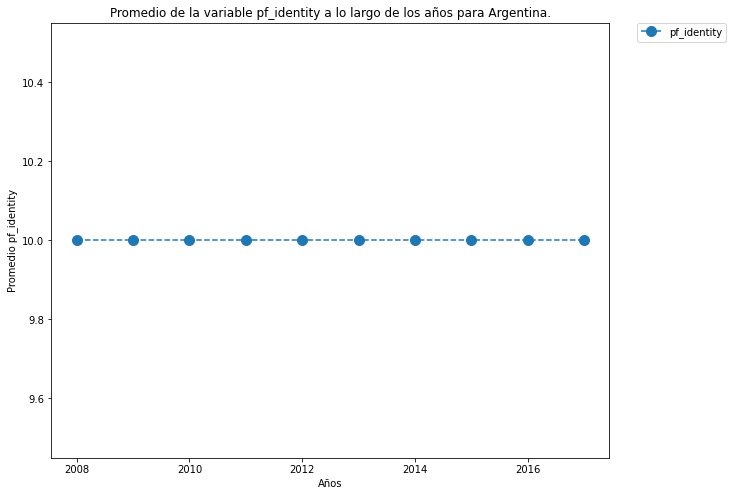

In [59]:
# 2.3
# Gráfico para Argentina para pf_identity a través del paso de los años.

# Agrupamos las dos columnas por año y Argentina.
arg_dataset = dataset[dataset.countries == 'Argentina']

pf_identity_arg_group_by_year = arg_dataset[['year', 'pf_identity']].groupby('year').mean()
pf_identity_arg_group_by_year = pf_identity_arg_group_by_year.reset_index() # Ponemos al año como una columna

plt.figure(figsize=(10,8))
plt.plot(pf_identity_arg_group_by_year['year'], pf_identity_arg_group_by_year['pf_identity'], label='pf_identity',linestyle='--', marker='o', markersize=10)

plt.ylabel('Promedio pf_identity')
plt.xlabel('Años')
plt.title('Promedio de la variable pf_identity a lo largo de los años para Argentina.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

P.3.1: 
3. Distribuciones
Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?

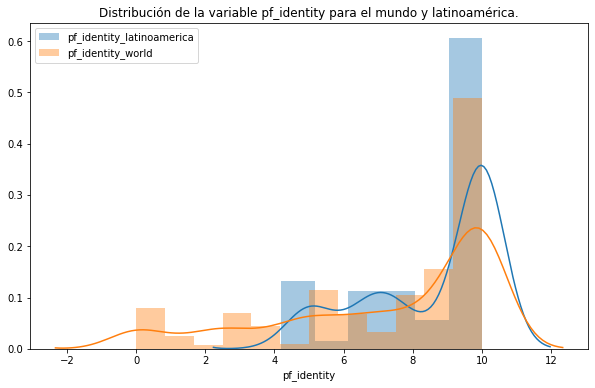

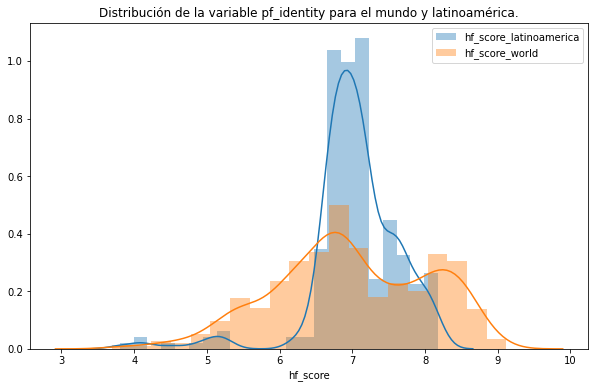

In [79]:
# Histograma para pf_identity global y en latinoamerica.

pf_identity_latinamerica = dataset[(dataset.region == "Latin America & the Caribbean")]['pf_identity']
plt.figure(figsize=(10,6))
plt.title('Distribución de la variable pf_identity para el mundo y latinoamérica.')
seaborn.distplot(pf_identity_latinamerica.dropna(), label='pf_identity_latinoamerica', kde=True, norm_hist=True)
seaborn.distplot(dataset.pf_identity.dropna(), label='pf_identity_world')
plt.legend()

hf_score_latinamerica = dataset[(dataset.region == "Latin America & the Caribbean")]['hf_score']
plt.figure(figsize=(10,6))
plt.title('Distribución de la variable pf_identity para el mundo y latinoamérica.')
seaborn.distplot(hf_score_latinamerica.dropna(), label='hf_score_latinoamerica', kde=True, norm_hist=True)
seaborn.distplot(dataset.hf_score.dropna(), label='hf_score_world')
plt.legend()

4. Correlaciones y Relaciones


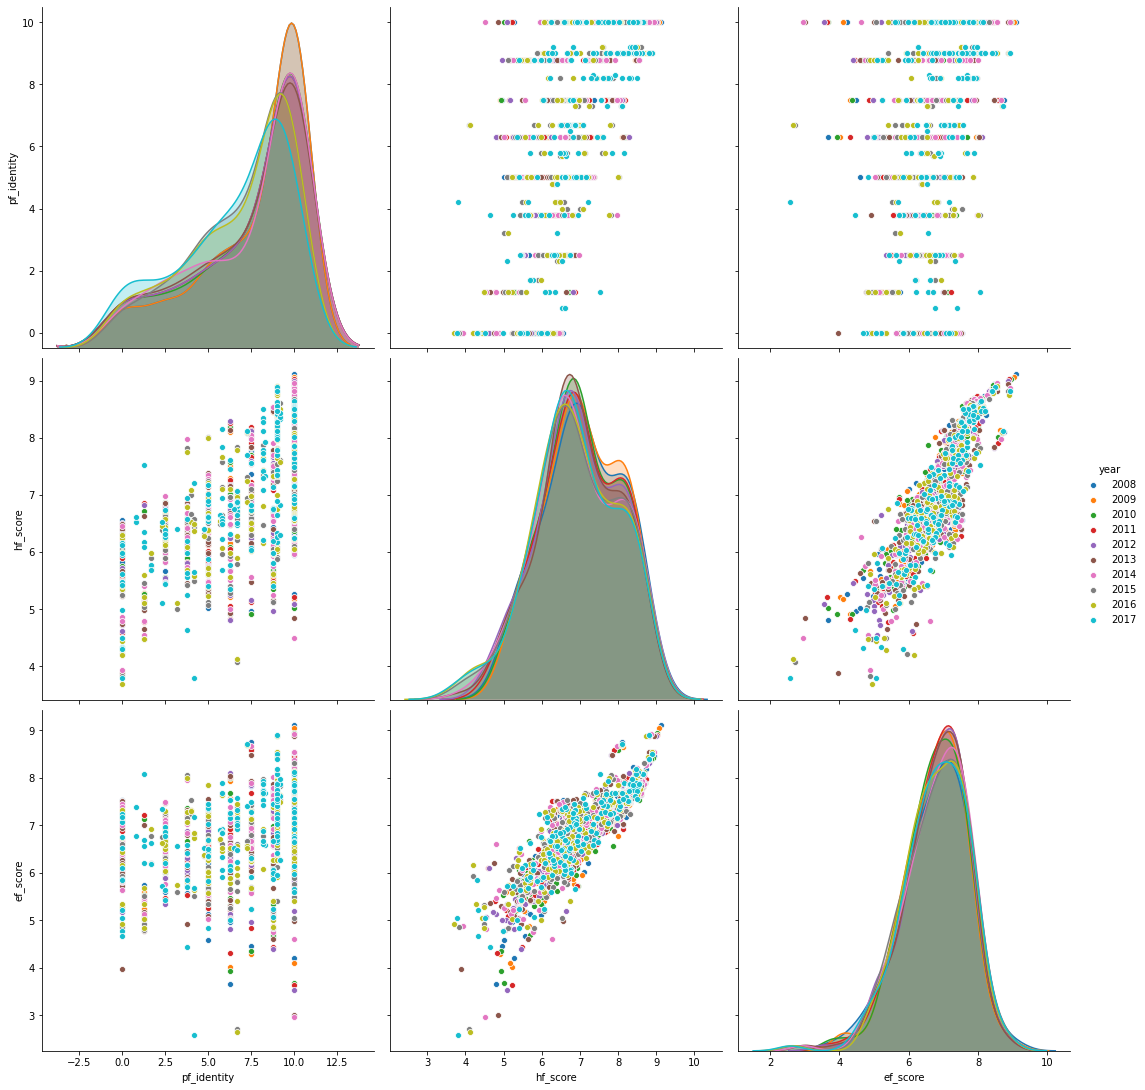

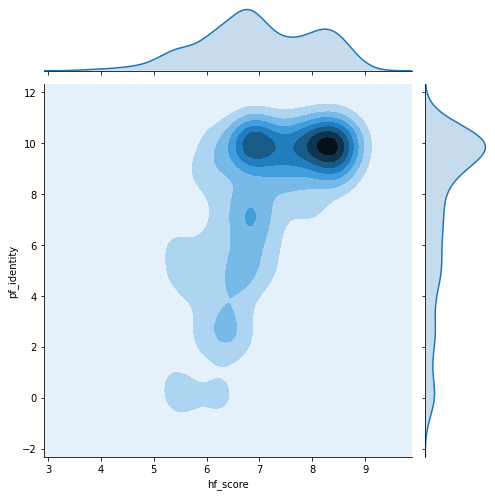

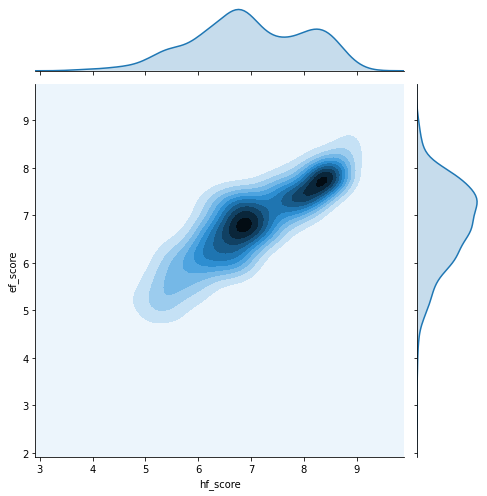

In [84]:
## Human freedom and economic freedom are positively related. It is because of its weight. Hf and pf move along,
# but the slope of their relation is low.
seaborn.pairplot(
    data=dataset,
    vars=['pf_identity', 'hf_score', 'ef_score'],
    hue='year', height=5)
# Joint plot
seaborn.jointplot(data=dataset, x='hf_score',
                  y='pf_identity', kind='kde', height=7)

seaborn.jointplot(data=dataset, x='hf_score',
                  y='ef_score', kind='kde', height=7)

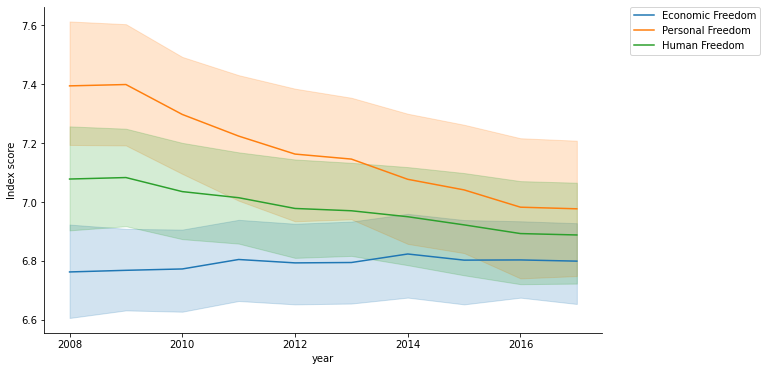

In [85]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset,
                 x='year', y='ef_score',
                 label='Economic Freedom')
seaborn.lineplot(data=dataset,
                 x='year', y='pf_score',
                 label='Personal Freedom')

seaborn.lineplot(data=dataset,
                 x='year', y='hf_score',
                 label='Human Freedom')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Index score')
seaborn.despine()

[[1.         0.67366293]
 [0.67366293 1.        ]]
[[1.         0.35915104]
 [0.35915104 1.        ]]
[[1.         0.64335401]
 [0.64335401 1.        ]]


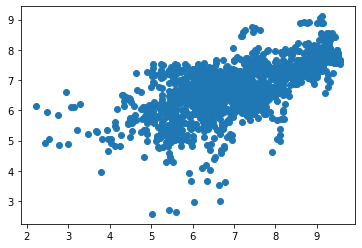

In [135]:
hf_dataset = dataset['hf_score']
ef_dataset = dataset['ef_score']
pf_dataset = dataset['pf_score']
pf_identity = dataset['pf_identity']
print(np.corrcoef(pf_dataset, ef_dataset))
print(np.corrcoef(pf_identity, ef_dataset))
print(np.corrcoef(pf_identity, hf_dataset))
#(pf_identity,pf_dataset, ef_dataset))
plt.scatter(pf_dataset, ef_dataset)

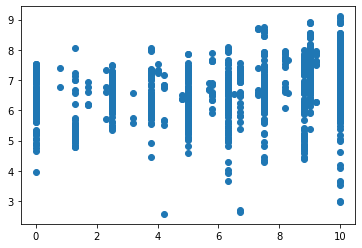

In [136]:
plt.scatter(pf_identity, ef_dataset)


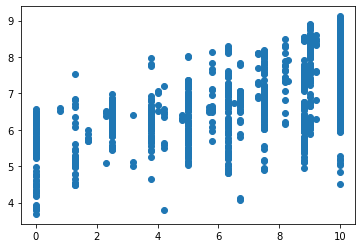

In [137]:
plt.scatter(pf_identity, hf_dataset)

La correlación entre la libertad económica y la libertad personal (libertad personal, modo identidad) es positiva. La correlación entre los indicadores agregados es mayor a la correlación entre la libertad económica y la libertad personal modo identidad. La correlación entre la libertad personal y su componente identidad se espera sea positiva, pero el signo puede diferir de acuerdo al peso que tiene el modo identidad en el total. En este caso, la correlación es positiva e igual a 0.64.
